**Tutorial Topics:**
1. Access pixel values and modify them

2. Set a Region of Interest (ROI)

3. Split and merge images

4. Cropping an image using Opencv function

5. Scaling or Resizing an image using Opencv function

6. Translation of an Image

7. Rotating an Image using Opencv function

8. Affine Transformation

9. Perspective Transformation

In [83]:
# Importing Packages
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys
from google.colab.patches import cv2_imshow

Success


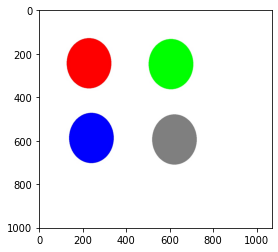

In [84]:
img=cv.imread('/content/drive/MyDrive/JUIT/Presentations/DIP using Python/images/ball3.jpg')
if img is None:
  print("Could not read the image.")
else:
  print("Success")
im=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(im,cmap='gray')

**1. Access pixel values and modify them**

In [85]:
img.dtype

dtype('uint8')

In [86]:
type(img)

numpy.ndarray

In [90]:
img[600][600]

array([127, 127, 127], dtype=uint8)

In [91]:
img[600][600][0]

127

In [93]:
img[600][600][1]

127

In [94]:
img[600,600,0]

127

**2. Set a Region of Interest (ROI)**

In [119]:
img1=img.copy()
print(img1.base)

None


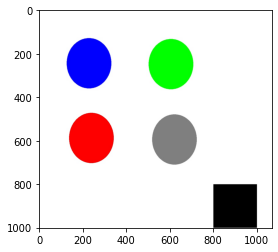

In [120]:
img1[800:1000,800:1000,:]=0
plt.imshow(img1)
# plt.imshow(img)

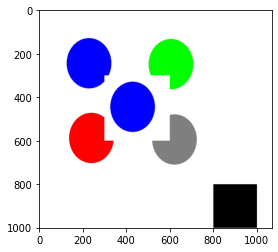

In [121]:
img1[300:600,300:600,:]=img1[100:400, 100:400,:]
plt.imshow(img1)

**3. Split and merge images**

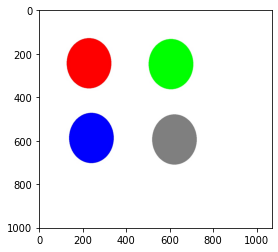

In [100]:
plt.imshow(im)

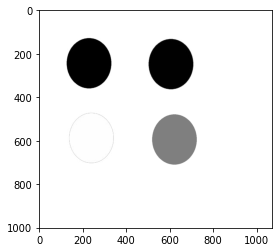

In [101]:
b,g,r = cv.split(img)
plt.imshow(b, cmap='gray')

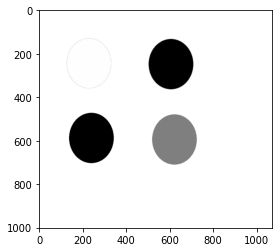

In [112]:
b,g,r = cv.split(img)
plt.imshow(r, cmap='gray')

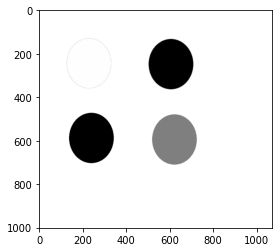

In [117]:
bb=img[:,:,2]
plt.imshow(bb, cmap='gray')

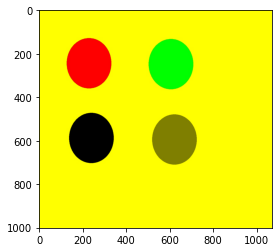

In [113]:
b[:,:]=0
img_merge = cv.merge((b,g,r))
imm = cv.cvtColor(img_merge,cv.COLOR_BGR2RGB)
plt.imshow(imm)

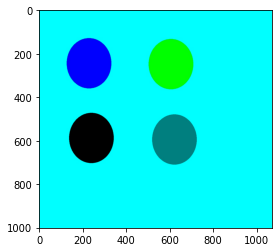

In [114]:
plt.imshow(img_merge)

**4. Cropping an image using Opencv function**

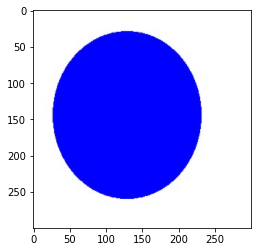

In [122]:
imcrop = img[100:400, 100:400, :]
plt.imshow(imcrop)

**5. Scaling or Resizing an image using Opencv function**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f620daee210>,
 Text(0.5, 1.0, 'size: 500X500'))

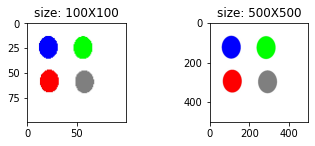

In [124]:
img1= cv.resize(img,(100,100))
plt.subplot(2,2,1), plt.imshow(img1,cmap='gray'), plt.title('size: 100X100')
img1= cv.resize(img,(500,500))
plt.subplot(2,2,2), plt.imshow(img1,cmap='gray'), plt.title('size: 500X500')
# img1= cv.resize(img,(1000,1000))
# plt.subplot(2,2,3), plt.imshow(img1,cmap='gray'), plt.title('size: 1000X1000')


(<matplotlib.axes._subplots.AxesSubplot at 0x7f620d338e90>,
 Text(0.5, 1.0, 'size: 4X'))

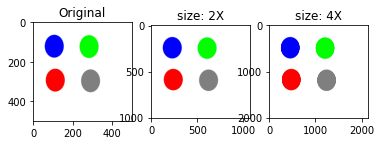

In [134]:
plt.subplot(1,3,1), plt.imshow(img1,cmap='gray'), plt.title('Original')
res = cv.resize(img,None,fx=1, fy=1, interpolation = cv.INTER_CUBIC)
plt.subplot(1,3,2), plt.imshow(res,cmap='gray'), plt.title('size: 2X')
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
plt.subplot(1,3,3), plt.imshow(res,cmap='gray'), plt.title('size: 4X')


**6. Translation of an Image using Opencv function**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f620d0f3750>,
 Text(0.5, 1.0, 'Translated Image'))

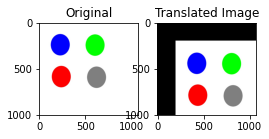

In [140]:
rows,cols,a = img.shape
M = np.float32([[1,0,200],[0,1,200]])
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(1,3,1), plt.imshow(img,cmap='gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(dst,cmap='gray'), plt.title('Translated Image')

**7. Rotating an Image using Opencv function**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f620ce784d0>,
 Text(0.5, 1.0, 'Translated Image'))

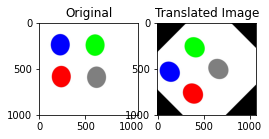

In [145]:
rows,cols,a = img.shape
# first and second argument is the center about which  image need to be rotated, 
# third argument is angle
# fourth argument is scaling
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,1)
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(1,3,1), plt.imshow(img,cmap='gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(dst,cmap='gray'), plt.title('Translated Image')

**8.Affine Transformation**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f620d48a890>,
 Text(0.5, 1.0, 'Translated Image'))

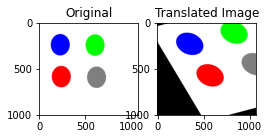

In [153]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(1,3,1), plt.imshow(img,cmap='gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(dst,cmap='gray'), plt.title('Translated Image')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f620d2d07d0>,
 Text(0.5, 1.0, 'Original rec. Image'))

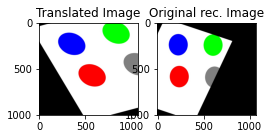

In [154]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts2,pts1)
dst1 = cv.warpAffine(dst,M,(cols,rows))
plt.subplot(1,3,1), plt.imshow(dst,cmap='gray'), plt.title('Translated Image')
plt.subplot(1,3,2), plt.imshow(dst1,cmap='gray'), plt.title('Original rec. Image')

**9. Perspective Transformation**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f620ca69d10>,
 Text(0.5, 1.0, 'Translated Image'))

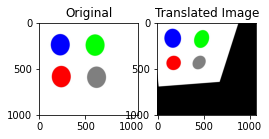

In [151]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(cols, rows))
plt.subplot(1,3,1), plt.imshow(img,cmap='gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(dst,cmap='gray'), plt.title('Translated Image')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f620cae6e90>,
 Text(0.5, 1.0, 'Original Image recovered'))

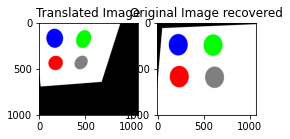

In [152]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts2,pts1)
dst1 = cv.warpPerspective(dst,M,(cols, rows))
plt.subplot(1,3,1), plt.imshow(dst,cmap='gray'), plt.title('Translated Image')
plt.subplot(1,3,2), plt.imshow(dst1,cmap='gray'), plt.title('Original Image recovered')